In [1]:
!pip install yfinance
!pip install yahooquery
!pip install tvdatafeed
!pip install tensorflow
!pip install mplfinance
!pip install cairocffi
from tvDatafeed import TvDatafeed, Interval
from yahooquery import Screener
import yfinance as yf   
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import random 
from tensorflow.keras.models import load_model
import os
import shutil
import mplfinance as mpl 
from datetime import datetime
import glob
from PIL import Image
import cv2
%matplotlib notebook
import gc
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('agg')
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,AveragePooling2D,GlobalAveragePooling2D
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
def work_with_dir():
  if os.path.exists("/content/data/"):
    shutil.rmtree("/content/data/", ignore_errors=True)
    print("Data Folder Removed")
    os.mkdir("/content/data/")
  if not os.path.exists("/content/data/"):
    os.mkdir("/content/data/")
  if not os.path.exists("/content/extracted/"):
    os.mkdir("/content/extracted/")
  if not os.path.exists("/content/checkpoints/"):
    os.mkdir("/content/checkpoints/")
def get_crypto_syms():
   screens = [
       'all_cryptocurrencies_us', 'all_cryptocurrencies_au', 'all_cryptocurrencies_ca', 'all_cryptocurrencies_eu', 'all_cryptocurrencies_gb', 'all_cryptocurrencies_in', ]
   s = Screener()
   symbols = []
   for i in screens:
      data = s.get_screeners(i, count=250)
      dicts = data[i]['quotes']
      syms = [d['symbol'] for d in dicts]
      for sym in syms:
        symbols.append(sym)
   return symbols
def download_data(symbols, periodd, intervall):
  indexx = 100
  work_with_dir()
  for symbol in symbols:
    if ((symbols.index(symbol)+1) % 100 == 0):
      print(f" -- {indexx}", end="")
      indexx = indexx + 100
    try:
        data = yf.download(symbol, period=periodd,
                           interval=intervall, progress=False, show_errors=False)
        if data.empty:
           pass
        else:
            data.to_csv(f"/content/data/{symbol}.csv")
    except:
       print("Error!")
  print(" ")
def extract_data(max_check, each_row_past):
  print(f"Files In Data : {len(os.listdir('/content/data/'))}")
  pd.options.mode.chained_assignment = None
  files = os.listdir("/content/data/")
  print("Processing File:")
  now = datetime.now().strftime("%H%M%S")
  os.mkdir(f"/content/extracted/{now}/")
  index = 1
  for file in files:
     print(f"File Number {index}:", end=" ")
     each_file_proc(file, now, max_check,
                     each_row_past)
     index = index + 1
  print(" ")
  return now
def each_file_proc(file, now, max_check, each_row_past):
    address = f"/content/data/{file}"
    data = pd.read_csv(address)
    if len(data.columns) == 7:
      data = data.iloc[:, 1:]
    data = np.array(data)
    data = data.astype(float)
    max_index = data.shape[0]-max_check
    lst = []
    for i in range(11,101,10):
            lst2 = []
            for x in range(i,i-10,-1):
              lst2.append(abs(data[-i][3]-data[-i][0]))
            lst.append(sum(lst2)/len(lst2))
    mean_candle = sum(lst)/len(lst)

    for i in range(each_row_past,max_index):
        rows = data[i-each_row_past:i, :]

        current_price = (data[i][0] + data[i][3])/2
        delta = mean_candle * 3

        high =round(current_price + delta)
        low = round(current_price - delta)

        sugg = 0
        for p in range(i+1,i+max_check):
          if data[p][3] <= low:
            sugg = 0
            break
          if data[p][3] >= high:
            sugg = 1
            break


        df = pd.DataFrame(rows, columns=["Open", "High", "Low", "Close","Adj Close","Volume"])

        df.index.name = "Date"

        df.index = pd.to_datetime(df.index)
        right_now = datetime.now().strftime("%H%M%S%f")
        address = f"/content/extracted/{now}/{right_now}_{sugg}.png"
        

        fig, _a = mpl.plot(df, type="candle", style="yahoo", axisoff=True,
                            returnfig=True, tight_layout=True,figsize =(1.5,1.5))
        
        fig.savefig(address)
        fig.clf()

        if i % 10 == 0:
            print(f"{i}/{max_index}", end=" ")
        if i % 20:
          plt.close("all")
        if i % 270 ==0:
          print("")
    plt.close("all")
    print("")

def start(max_check, each_row_past):
    folder_name = extract_data(
        max_check, each_row_past)
    return folder_name

In [11]:
symbols = get_crypto_syms()
print(f"Symbols : {len(symbols)}")
symbols = ["btc-usd","eth-usd","trx-usd","ltc-usd","xrp-usd","bnb-usd"]
symbols = ["btc-usd"]
download_data(symbols[:300],"730d","1h")

Symbols : 1500
Data Folder Removed
 


In [12]:
max_check = 15
each_row_past = 85

folder_name = start(max_check,each_row_past)
len(os.listdir(f"/content/extracted/{folder_name}"))

Files In Data : 1
Processing File:
File Number 1: 90/17167 100/17167 110/17167 120/17167 130/17167 140/17167 150/17167 160/17167 170/17167 180/17167 190/17167 200/17167 210/17167 220/17167 230/17167 240/17167 250/17167 260/17167 270/17167 
280/17167 290/17167 300/17167 310/17167 320/17167 330/17167 340/17167 350/17167 360/17167 370/17167 380/17167 390/17167 400/17167 410/17167 420/17167 430/17167 440/17167 450/17167 460/17167 470/17167 480/17167 490/17167 500/17167 510/17167 520/17167 530/17167 540/17167 
550/17167 560/17167 570/17167 580/17167 590/17167 600/17167 610/17167 620/17167 630/17167 640/17167 650/17167 660/17167 670/17167 680/17167 690/17167 700/17167 710/17167 720/17167 730/17167 740/17167 750/17167 760/17167 770/17167 780/17167 790/17167 800/17167 810/17167 
820/17167 830/17167 840/17167 850/17167 860/17167 870/17167 880/17167 890/17167 900/17167 910/17167 920/17167 930/17167 940/17167 950/17167 960/17167 970/17167 980/17167 990/17167 1000/17167 1010/17167 1020/17167 1030/

17082

In [3]:
folder_name = "181613"

shutil.make_archive(folder_name,"zip",f"/content/extracted/{folder_name}/")
#shutil.unpack_archive(f"/content/{folder_name}.zip",f"/content/extracted/{folder_name}")
label = []
data  = []
files = os.listdir(f"/content/extracted/{folder_name}/")
for i, image_name in enumerate(files):
  if image_name.split(".")[1] == "png":
    image = cv2.imread(f"/content/extracted/{folder_name}"+"/"+image_name,0)
    dim = (128, 128)
    resized = cv2.resize(image, dim)
    data.append(np.array(resized))
    sugg = image_name.split("_")[1].split(".")[0]
    label.append(int(sugg))
data = np.array(data)
data = data / 255
print(data.shape)
xTrain , xTest , yTrain , yTest = train_test_split(data,label,test_size=0.2,random_state=99)
data = None
label = None
print(f"xTrain : {len(xTrain)} \\ xTest : {len(xTest)}")
nytrain = []
nytest = []
yn = 0
nn = 0
for i in yTrain:
  if i == 1:
    nytrain.append([1,0])
    yn += 1
  else:
    nytrain.append([0,1])
    nn += 1
for i in yTest:
  if i == 1:
    nytest.append([1,0])
    yn += 1
  else:
    nytest.append([0,1])
    nn += 1
yTrain = np.array(nytrain)
yTest = np.array(nytest)
print(f"yn: {yn} nn: {nn}")

(17082, 128, 128)
xTrain : 13665 \ xTest : 3417
yn: 7697 nn: 9385


In [4]:
model = load_model("1.h5")

In [ ]:
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(128,     (3,3),activation="relu", input_shape=(xTrain.shape[1], xTrain.shape[2],1), kernel_regularizer=l2(0.00005), bias_regularizer=l2(0.00005)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128,     (3,3),activation="relu", kernel_regularizer=l2(0.00005), bias_regularizer=l2(0.00005))) 
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Conv2D(100,     (3,3),activation="relu", kernel_regularizer=l2(0.00005), bias_regularizer=l2(0.00005)))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,      (3,3),activation="relu", kernel_regularizer=l2(0.00005), bias_regularizer=l2(0.00005)))
model.add(Flatten())
model.add(Dense(900,activation="relu", kernel_regularizer=l2(0.00005), bias_regularizer=l2(0.00005)))
model.add(Dropout(0.1))
model.add(Dense(900,activation="relu", kernel_regularizer=l2(0.00005), bias_regularizer=l2(0.00005)))
model.add(Dropout(0.1))
model.add(Dense(900,activation="relu", kernel_regularizer=l2(0.00005), bias_regularizer=l2(0.00005)))
model.add(Dropout(0.1))
model.add(Dense(900,activation="relu", kernel_regularizer=l2(0.00005), bias_regularizer=l2(0.00005)))
model.add(Dense(2,activation="sigmoid"))

adamax = tf.keras.optimizers.Adamax(
    learning_rate=0.00015)
model.compile(loss='categorical_crossentropy',
              optimizer=adamax,
              metrics=['accuracy'])
model.summary()

In [15]:
filepath = "/content/checkpoints/{epoch:02d}-{val_accuracy:.2f}.h5"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

#model.fit(xTrain,yTrain,batch_size=64,epochs=30,validation_data=(xTest,yTest), callbacks=model_checkpoint_callback)
model.fit(xTrain,yTrain,batch_size=32,epochs=20,validation_data=(xTest,yTest))

Epoch 1/20
428/428 [==============================] - 22s 52ms/step - loss: 0.0337 - accuracy: 0.9967 - val_loss: 1.0596 - val_accuracy: 0.8183
Epoch 2/20
428/428 [==============================] - 22s 52ms/step - loss: 0.0297 - accuracy: 0.9981 - val_loss: 1.2220 - val_accuracy: 0.8174
Epoch 3/20
428/428 [==============================] - 22s 52ms/step - loss: 0.0332 - accuracy: 0.9968 - val_loss: 1.0867 - val_accuracy: 0.8232
Epoch 4/20
428/428 [==============================] - 22s 52ms/step - loss: 0.0309 - accuracy: 0.9974 - val_loss: 1.2508 - val_accuracy: 0.8180
Epoch 5/20
428/428 [==============================] - 22s 52ms/step - loss: 0.0291 - accuracy: 0.9979 - val_loss: 1.1528 - val_accuracy: 0.8206
Epoch 6/20
428/428 [==============================] - 22s 52ms/step - loss: 0.0269 - accuracy: 0.9987 - val_loss: 1.1839 - val_accuracy: 0.8209
Epoch 7/20
428/428 [==============================] - 22s 52ms/step - loss: 0.0273 - accuracy: 0.9982 - val_loss: 1.1574 - val_accuracy:

In [ ]:
model.evaluate(xTest,yTest)

In [15]:
model.save(f"1.h5")

In [10]:
each_row_past= 85

[*********************100%***********************]  1 of 1 completed
                                   Open          High           Low  \
2022-07-26 00:00:00+00:00  21361.121094  21361.121094  21028.496094   
2022-07-26 01:00:00+00:00  21022.257812  21109.111328  21020.304688   
2022-07-26 02:00:00+00:00  21093.880859  21119.511719  21081.531250   
2022-07-26 03:00:00+00:00  21087.292969  21190.025391  21019.888672   
2022-07-26 04:00:00+00:00  21155.894531  21201.144531  21128.802734   
...                                 ...           ...           ...   
2022-08-04 16:00:00+00:00  22927.541016  22954.425781  22575.986328   
2022-08-04 17:00:00+00:00  22590.181641  22638.937500  22590.181641   
2022-08-04 18:00:00+00:00  22639.583984  22662.275391  22502.861328   
2022-08-04 19:00:00+00:00  22557.619141  22612.839844  22548.386719   
2022-08-04 19:34:00+00:00  22582.818359  22582.818359  22582.818359   

                                  Close     Adj Close      Volume  
2022-07-26

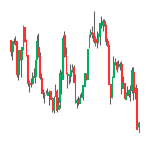

In [11]:
symbol,period,interval="btc-usd","10d","1h"
data = yf.download(tickers=symbol,period=period,interval=interval)
print(data)
data = np.array(data)
data = data.astype(float)
i = -2
rows = data[i-each_row_past:i, :]
df = pd.DataFrame(rows, columns=["Open", "High", "Low", "Close","Adj Close","Volume"])
df.index.name = "Date"
df.index = pd.to_datetime(df.index)
fig, _a = mpl.plot(df, type="candle", style="yahoo", axisoff=True,
                            returnfig=True, tight_layout=True,figsize =(1.5,1.5))
fig.savefig("picture.png")

In [12]:
image = cv2.imread("/content/picture.png",0)
dim = (128, 128)
resized = cv2.resize(image, dim)
data = np.array(resized)
model.predict([[data.reshape(1,128,128,1)]])

array([[1., 0.]], dtype=float32)

you are using nologin method, data you access may be limited


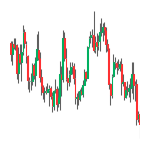

In [13]:
tv = TvDatafeed()
data = tv.get_hist(symbol="btcusdt",exchange="binance",interval=Interval.in_1_hour,n_bars=1000)
data = np.array(data)
i = -1
rows = data[i-each_row_past:i, 1:5]
rows.shape
df = pd.DataFrame(rows, columns=["Open", "High", "Low", "Close"])
df.index.name = "Date"
df.index = pd.to_datetime(df.index)
df = df.apply(lambda col:pd.to_numeric(col, errors='coerce'))
fig, _a = mpl.plot(df, type="candle", style="yahoo", axisoff=True,
                            returnfig=True, tight_layout=True,figsize =(1.5,1.5))
fig.savefig("picture1.png")

In [14]:
image = cv2.imread("/content/picture1.png",0)
dim = (128, 128)
resized = cv2.resize(image, dim)
data = np.array(resized)
model.predict([[data.reshape(1,128,128,1)]])

array([[1., 0.]], dtype=float32)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')